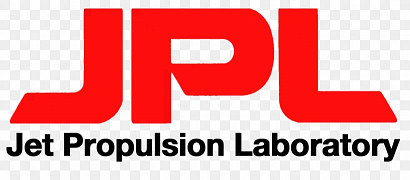
# Function: Ground Sample Distance

In [ ]:
#Library's for import
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets


#Prints box to enter altitude
lbl1=widgets.Label('Enter Altitude in Meters')
display(lbl1)
text1=widgets.Text()
display(text1)

#lbl2=widgets.Label('Enter Horizontal Pixels')
#display(lbl2)
#text2=widgets.Text()
#display(text2)

#lbl3=widgets.Label('Enter Vertical Pixels')
#display(lbl3)
#text3=widgets.Text()
#display(text3)

lbl4=widgets.Label('Enter Pixel Size in Microns')
display(lbl4)
text4=widgets.Text()
display(text4)

lbl5=widgets.Label('Enter Lens Focal Length in Meters')
display(lbl5)
text5=widgets.Text()
display(text5)

#lbl6=widgets.Label('Enter Lens Aperature')
#display(lbl6)
#text6=widgets.Text()
#display(text6)

#lbl7=widgets.Label('Enter Off Nadir Angle in Degrees')
#display(lbl7)
#text7=widgets.Text()
#display(text7)

#Displays buttons intiates calculation
btn=widgets.Button(description='Calculate')
display(btn)
lbl3=widgets.Label()
display(lbl3)

def calc (b):
    
    #Defines the variables from text box inputs
    Alt=float(text1.value)
    #Horz=float(text2.value)
    #Vert=float(text3.value)
    p=float(text4.value)
    p = p*10e-06 #Converts pixel size into meters
    EFL=float(text5.value)
    #EFD=float(text6.value)
    #ONA=float(text7.value)
    
    #Constants
    pi = math.pi #Defines pi
    Re = 6.37e6  #Radius of Earth
    
    #Calculations
    theta = p/EFL #Defines theta in radions
    gsd = theta*Alt #Defines gsd = Equals distance in radions multiplied by the altitude
    thetaT = math.asin(Re/(Re + Alt)) #When off nadir angle reaches tangent
    print ('Nadir gsd = %6.4f' %(gsd), 'M       iFOV = %6.4e' %(theta),'Radian     Critical Angle = %5.2f' %(thetaT*180/pi))

    #The Full Field Of View is the horizontal multiplied by the vertical and the Ground Sample Distance
    #flvw = Horz*Vert*gsd
    #print ('Full Field Of View',flvw,'M*2')
    
    
    def plot_func(Angle):
       
        #Calculations for opposite sides of triangles
        ONAr=Angle*pi/180 #off Nadir angle in radians
        O1 = Alt*math.tan(ONAr)
        O2 = Alt*math.tan(ONAr + theta)
        O3 = Alt*math.tan(thetaT)
        H1= Alt/math.cos(ONAr)
        ogsd = O2 - O1
     
        #Formats numbers for display
        ogsdr=format(ogsd,'.4e')
        o1r=format(O1,'.4e')
        H1R=round(H1,2)
        #print('Angle in Rad=', ONAr,'   Base= ',O1)
     
        #Makes x,y points for lines on graoh   
        x1 = [0, O1] #leading side of cone
        x2 = [0, 0.9*O2]  # trailing side -  Mult by 0.9 to see it on graph
        xc = [0, O3]   #critical angle dotted line
        xgsd =[O1,O2] #gsd is space between the two
        y = [Alt,0] #y values 
        
        #Sets up graph and labels
        fig = plt.figure(figsize=(10,4))
        plt.title('Off Nadir Ground Sample Distance Calculation')
        plt.ylabel('Altitude - M')
        plt.xlabel('Down Range Dist - M')
        plt.axis([0, Alt*2, 0, Alt])
        plt.plot (xc , y,':r',linewidth=3)
        
        #Conditional statement for Off Nadir Angle (radians)
        if (ONAr<= thetaT):
            #Graphs and Prints result when ONAr does not exceed critical angle
            plt.plot (x1 , y,color = 'Blue')
            plt.plot (x2 , y, color = 'Green')
            plt.plot([O1,0.9*O2],[Alt*0.01,Alt*0.01], linewidth=3, color='purple')
            #plt.text(O1,0,'|',color='black')
            plt.text(Alt,Alt*.8,'      Slant Range = ' + str(H1R),color='blue')
            plt.text(Alt,Alt*.7,'                  GSD = ' + str(ogsdr),color='purple')
            plt.text(Alt,Alt*.6,'Down Rang Dist = ' + str(o1r),color='black')
        else: 
            #changes everything to red if critical angle is exceeded
            plt.plot (x1 , y,color = 'Red')
            plt.plot (x2 , y, color = 'Red') 
            plt.text(Alt,Alt*.8,'    Slant Range =  XXXXX' ,color='Red')
            plt.text(Alt,Alt*.7,'                 GSD = XXXXX',color='Red')
            plt.text(Alt,Alt*.6,'Down Rang Dist = XXXXXX',color='Red')
            plt.text(Alt/10, Alt/5, "  Critical Angle Exceeded", color='Red')
            
        
    #The slider
    interact(plot_func, Angle = widgets.FloatSlider(value=30, min=0, max=90, step=1))
    
#The Button 
btn.on_click(calc)

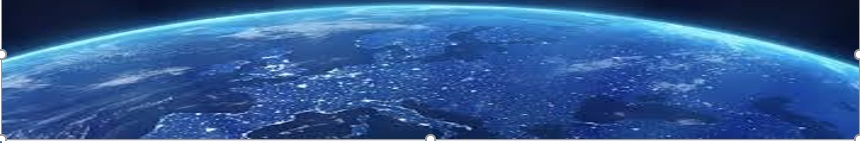
Code by: Ryan Devitt